In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gym

from utils import discretize_space_uniform, discretize_space_non_uniform, moving_avg
import Random
import Sarsa
import Q_learning


#from my_lunar_lander import LunarLander
#env = LunarLander()
env = gym.make("LunarLander-v2")

### Run the model-free sarsa and q_learning models
random results are showed for comparison

In [2]:
x_space = discretize_space_non_uniform(-3, -1, 1, 3, n_bins=6)
y_space = discretize_space_non_uniform(0, 1, 1.5, 2, n_bins=4)
vx_space = discretize_space_uniform(-2, 2, n_bins=4)
vy_space = discretize_space_uniform(-2, 0.5, n_bins=4)
theta_space = discretize_space_uniform(-3, 3, n_bins=4)
omega_space = discretize_space_uniform(-1, 1, n_bins=4)

discretization = [x_space, y_space, vx_space, vy_space, theta_space, omega_space]

In [3]:
alpha = 0.01
gamma = 0.99
episodes = 1000
ep_min_decay = 1000

rew_r = Random.random(env, episodes)
rew_s = Sarsa.sarsa(env, discretization, ep_min_decay, alpha, gamma, episodes)
rew_q = Q_learning.q_learning(env, discretization, ep_min_decay, alpha, gamma, episodes)

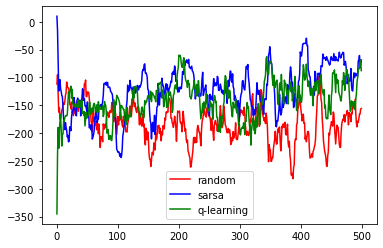

In [ ]:
mean_rewards_r = moving_avg(rew_r)
mean_rewards_s = moving_avg(rew_s)
mean_rewards_q = moving_avg(rew_q)

plt.plot(mean_rewards_r, color="red", label="random")
plt.plot(mean_rewards_s, color="blue", label="sarsa")
plt.plot(mean_rewards_q, color="green", label="q-learning")
plt.legend()
plt.show()